In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set color pallett
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

## Load and inspect data

In [2]:
# Load from csv
data = pd.read_csv('./data.csv')
data.head()

,Semester,CRN,Course,Course title,Grade,Grade Points
0,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,A,4.0
1,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,A-,3.7
2,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B+,3.3
3,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B,3.0
4,Fall 2021,15741,ART203V01,Photography: Ambient Daylight,B,3.0


In [3]:
data['Grade Points'].describe()

count    87.000000
mean      2.989655
std       0.845925
min       0.000000
25%       2.700000
50%       3.000000
75%       3.700000
max       4.000000
Name: Grade Points, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Semester      88 non-null     object 
 1   CRN           88 non-null     int64  
 2   Course        88 non-null     object 
 3   Course title  88 non-null     object 
 4   Grade         88 non-null     object 
 5   Grade Points  87 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.2+ KB


## Add Z-score

In [5]:
# Calculate and add Z-score for grade points
data['Standardized Grade Points'] = (data['Grade Points'] - data['Grade Points'].mean()) / data['Grade Points'].std()
data[['Grade Points', 'Standardized Grade Points']].describe()

,Grade Points,Standardized Grade Points
count,87.000000,8.700000e+01
mean,2.989655,-3.394475e-16
std,0.845925,1.000000e+00
min,0.000000,-3.534184e+00
25%,2.700000,-3.424123e-01
50%,3.000000,1.222901e-02
75%,3.700000,8.397254e-01
max,4.000000,1.194367e+00


## Histogram

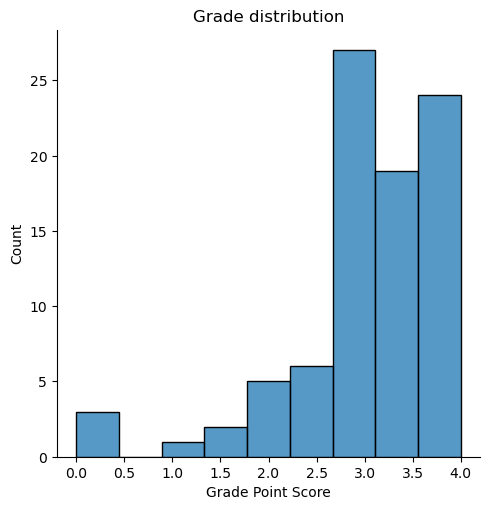

In [6]:
ax = sns.displot(
    data=data, 
    x="Grade Points"
)

plot = ax.set(
    xlabel='Grade Point Score',
    ylabel='Count', 
    title='Grade distribution'
)

## Sample density plots

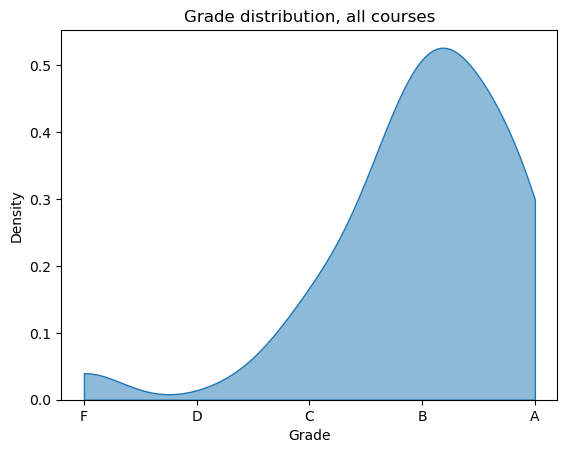

In [7]:
ax = sns.kdeplot(
    data=data, 
    x="Grade Points",
    fill=True,
    alpha=.5, 
    cut=0
)

plot = ax.set(
    xlabel='Grade', 
    ylabel='Density', 
    title='Grade distribution, all courses'
)

xticks = ax.set_xticks(range(5), labels=['F','D','C','B','A'])

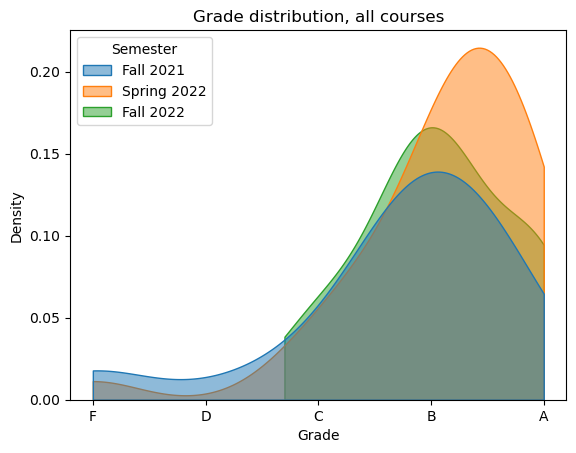

In [21]:
ax = sns.kdeplot(
    data=data, 
    x="Grade Points",
    hue="Semester",
    fill=True,
    alpha=.5,
    cut=0
)

ax.set(
    xlabel='Grade', 
    ylabel='Density', 
    title='Grade distribution, all courses'
)

sns.move_legend(ax, "upper left")

xticks = ax.set_xticks(range(5), labels=['F','D','C','B','A'])

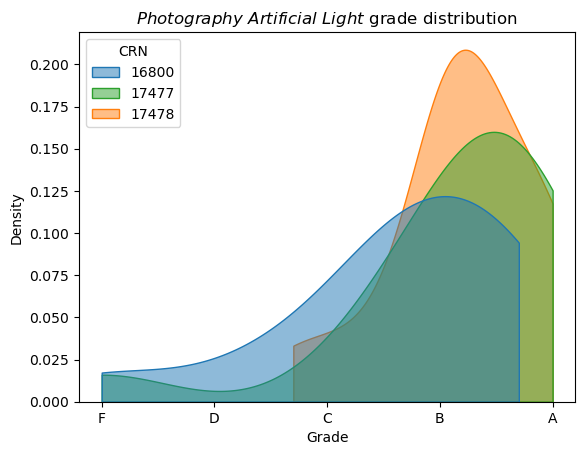

In [19]:
ax = sns.kdeplot(
    data=data[data['Course title'] == 'Photography: Artificial Light'], 
    x="Grade Points",
    hue='CRN',
    palette=palette[:3],
    fill=True,
    alpha=.5,
    cut=0
)

ax.set(
    xlabel='Grade', 
    ylabel='Density', 
    title='$\it{Photography\ Artificial\ Light}$ grade distribution'
)

sns.move_legend(ax, "upper left")

xticks = ax.set_xticks(range(5), labels=['F','D','C','B','A'])

## Kolmogorov–Smirnov test of normality

In [10]:
norm = np.random.randn(87)
norm_stat, norm_p = stats.kstest(norm, stats.norm.cdf)

uniform = np.random.uniform(min(norm), max(norm), 87)
uniform_stat, uniform_p = stats.kstest(uniform, stats.norm.cdf)

grade_point_stat, grade_point_p = stats.kstest(data['Grade Points'], norm)
grade_point_Z_stat, grade_point_Z_p = stats.kstest(data['Standardized Grade Points'], norm)

values = {
    'norm_stat': norm_stat,
    'norm_p': norm_p,
    'uniform_stat': uniform_stat,
    'uniform_p': uniform_p ,
    'grade_point_stat': grade_point_stat,
    'grade_point_p': grade_point_p,
    'grade_point_Z_stat': grade_point_Z_stat,
    'grade_point_Z_p': grade_point_Z_p    
}

s = """
Positive control - standard normal distribution
 KS test statistic: {norm_stat}
 p-value          : {norm_p}
 Null hypothesis  : accept

Negative control - uniform random distribution
 KS test statistic: {uniform_stat}
 p-value          : {uniform_p}
 Null hypothesis  : reject

Grade point distribution
 KS test statistic: {grade_point_stat}
 p-value          : {grade_point_p}
 Null hypothesis  : reject

Standardized grade point distribution
 KS test statistic: {grade_point_Z_stat}
 p-value          : {grade_point_Z_p}
 Null hypothesis  : barely accept
"""

print(s.format(**values))


Positive control - standard normal distribution
 KS test statistic: 0.15906922690563718
 p-value          : 0.02170922037754658
 Null hypothesis  : accept

Negative control - uniform random distribution
 KS test statistic: 0.28976506456378126
 p-value          : 5.795794087146451e-07
 Null hypothesis  : reject

Grade point distribution
 KS test statistic: 0.8628526645768025
 p-value          : 5.131507557417984e-34
 Null hypothesis  : reject

Standardized grade point distribution
 KS test statistic: 0.18717345872518287
 p-value          : 0.08202208266744473
 Null hypothesis  : barely accept



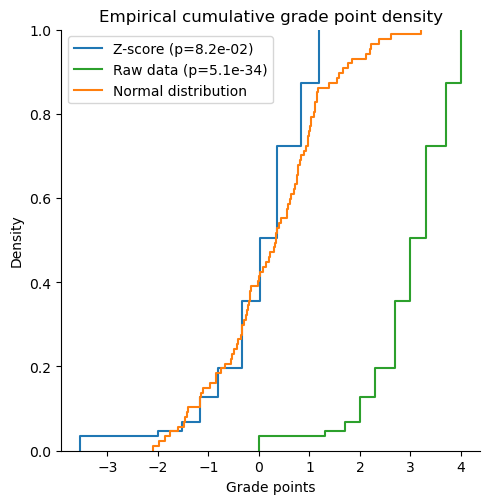

In [11]:
ax = sns.displot(
    data=data, 
    x="Standardized Grade Points",
    kind='ecdf'
)
sns.ecdfplot(data['Grade Points'], color=palette[1])

sns.ecdfplot(norm, color=palette[2])

plt.legend(labels=[
    f'Z-score (p={grade_point_Z_p:.1e})',
    f'Raw data (p={grade_point_p:.1e})',
    'Normal distribution'
])

plot = ax.set(
    xlabel='Grade points', 
    ylabel='Density', 
    title='Empirical cumulative grade point density'
)